In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [80]:
def softmax(z: np.ndarray) -> np.ndarray:
    """Calculates the softmax of 2D numpy array

    Args:
        z (np.ndarray): Input array (m: number of samples, n: number of classes)

    Returns:
        np.ndarray: Softmax Probabilites (m: probability distribuiton, sums to 1, n)

    Notes:
        applied normalization to prevent numerical overflow or instability
    """
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [81]:
def loss_softmax(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Calculates the cost / loss / risk for softmax

    Args:
        y_true (np.ndarray): True Label Vector (one-hot encoded) (c, )
        y_pred (np.ndarray): Predicted Label Probabilities Vector (c, )

    Returns:
        float: Cross-entropy loss for the observation
    """

    return -np.sum(y_true * np.log(y_pred + 1e-10))

In [82]:
def calculate_cost(X: np.ndarray, y: np.ndarray, W: np.ndarray, b: np.ndarray) -> float:
    """Calulates the cost value for given parameter (W, b)

    Args:
        X (np.ndarray): Feature Matrix (n ,d)
        y (np.ndarray): Label Vector (n, c)
        W (np.ndarray): Weights matrix (d, c)
        b (np.ndarray): Bias Vector (c,)

    Returns:
        float: Average cross-entropy / loss over all the samples
    """    
    n, d = X.shape
    z = (X @ W) + b
    y_pred = softmax(z)
    return loss_softmax(y, y_pred) / n

In [83]:
def compute_softmax_gradients(
    X: np.ndarray, y: np.ndarray, W: np.ndarray, b: np.ndarray
) -> tuple[float, float]:
    """Calculates the gradients of Weights and bias for softmax

    Args:
        X (np.ndarray): Feature Matrix (n, d)
        y (np.ndarray): Label Vector (n, c)
        W (np.ndarray): Weights matrix (d, c)
        b (np.ndarray): Bias Vector (c, )

    Returns:
        tuple[float , float]: gradient of Weights(d, c) and bias(c, )
    """
    n, d = X.shape
    z = (X @ W) + b
    y_pred = softmax(z)
    grad_W = (1 / n) * np.dot(X.T, (y_pred - y))
    grad_B = (1 / n) * np.sum(y_pred - y, axis=0)
    return grad_W, grad_B

In [84]:
def gradient_descent_softmax(
    X: np.ndarray,
    y: np.ndarray,
    W: np.ndarray,
    b: np.ndarray,
    iterations: int,
    alpha: float,
    show_cost: bool = False,
) -> tuple[float, float, list]:
    """Calculates the optimal parameters (W, b)

    Args:
        X (np.ndarray): Feature Matrix (n, d)
        y (np.ndarray): Label Vecotr (n, c)
        W (np.ndarray): Weight matrix (d, c)
        b (np.ndarray): Bias Vector (c,)
        iterations (int): number of
        alpha (float): _description_
        show_cost (bool, optional): _description_. Defaults to False.

    Returns:
        tuple[float, float, list]: Optimized weights, bias and cost history
    """
    cost_history = []
    for i in range(iterations):
        grad_W, grad_B = compute_softmax_gradients(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_B
        cost = calculate_cost(X, y, W, b)
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == iterations - 1):
            print(f"Iteration {i}: Cost: {cost}")

    return W, b, cost_history

Iteration 0: Cost: 1.1551154644885329
Iteration 100: Cost: 1.1241728954193033
Iteration 200: Cost: 1.1151253486390713
Iteration 300: Cost: 1.111276149405679
Iteration 400: Cost: 1.1086876704586768
Iteration 499: Cost: 1.1064795660262512


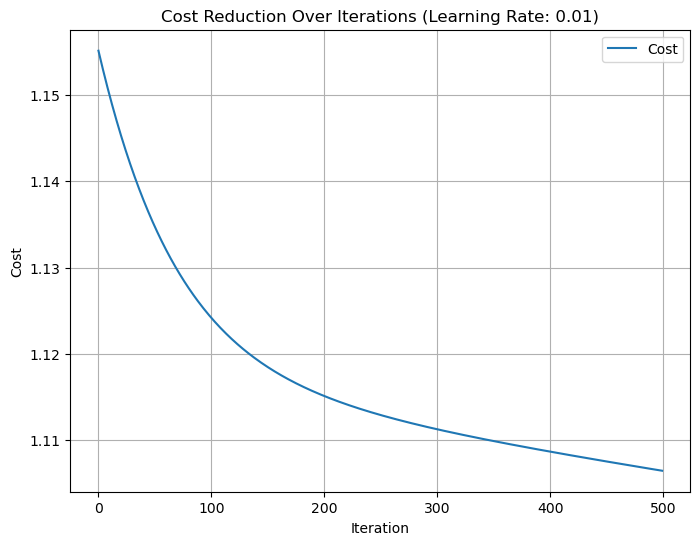

Initial Cost: 1.1551154644885329
Final Cost: 1.1064795660262512


In [85]:
def test_gradient_descent_softmax_with_plot():
  # Generate synthetic data for testing
  np.random.seed(0)
  n, d, c = 100, 5, 3 # 100 samples, 5 features, 3 classes
  X = np.random.rand(n, d)
  y_indices = np.random.randint(0, c, size=n)
  y = np.zeros((n, c))
  y[np.arange(n), y_indices] = 1 # One-hot encoding

  # Initialize weights and biases
  b = np.random.rand(c)
  W = np.random.rand(d, c)

  # Parameters for gradient descent
  alpha = 0.01 # Learning rate
  n_iter = 500 # Number of iterations
  
  # Run gradient descent
  W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, n_iter, alpha, show_cost=True)
  # Plot the cost history
  plt.figure(figsize=(8, 6))
  plt.plot(range(n_iter), cost_history, label="Cost")
  plt.xlabel("Iteration")
  plt.ylabel("Cost")
  plt.title(f"Cost Reduction Over Iterations (Learning Rate: {alpha})")
  plt.legend()
  plt.grid()
  plt.show()
  # Final cost should ideally be less than initial cost
  print(f"Initial Cost: {cost_history[0]}")
  print(f"Final Cost: {cost_history[-1]}")

test_gradient_descent_softmax_with_plot()

In [86]:
def predict_softmax(X: np.ndarray, W: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Predicts the class labels for input data

    Args:
        X (np.ndarray): Feature Matrix (n, d)
        W (np.ndarray): Weights matrix (d, c)
        b (np.ndarray): Bias Vector (c, )

    Returns:
        np.ndarray: Predicted Class Label (n, )
    """
    z = (X @ W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)

In [87]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    accuracy_score,
    recall_score,
    f1_score,
    precision_recall_curve,
)


def evaluate_classification(y_pred: np.ndarray, y_true: np.ndarray) -> tuple:
    """
    Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.
    Parameters:
      y_true (numpy.ndarray): True class labels of shape (n,).
      y_pred (numpy.ndarray): Predicted class labels of shape (n,).
    Returns:
      tuple: Confusion matrix, precision, recall, and F1-score.
    """
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1

In [88]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv('../datasets/Titanic-Dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
# check the unique values 
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [90]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
# check for null
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
# impute the missing values
mode_value = titanic_df["Cabin"].mode()[0] 
titanic_df.fillna({"Cabin": mode_value}, inplace=True)

median_value = titanic_df["Age"].median()
titanic_df.fillna({"Age": median_value}, inplace=True)

In [94]:
titanic_df.dropna(inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [95]:
titanic_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 889, dtype: bool

In [96]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
from sklearn.model_selection import train_test_split
X = titanic_df[
    ["Survived", "Age", "Parch", "SibSp", "Sex", "Embarked"]
] 
y = titanic_df[["Pclass"]] 


In [98]:
# One-hot encode categorical variables manually
sex_encoded = pd.get_dummies(titanic_df["Sex"], prefix="Sex")
embarked_encoded = pd.get_dummies(titanic_df["Embarked"], prefix="Embarked")

numerical_features = ["Age", "Fare", "SibSp", "Parch"]
numerical_data = titanic_df[numerical_features]
numerical_data_normalized = (
    numerical_data - numerical_data.mean()
) / numerical_data.std()


X = pd.concat([numerical_data_normalized, sex_encoded, embarked_encoded], axis=1).values
y = titanic_df["Pclass"].values


num_classes = len(np.unique(y))
y_one_hot = np.eye(num_classes)[y - 1]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42, stratify=y_one_hot
)

X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)
y_train = np.array(y_train, dtype=float)
y_test = np.array(y_test, dtype=float)


Training Softmax Regression Model:
Iteration 0: Cost: 1.067656256497937
Iteration 100: Cost: 0.6798616696585821
Iteration 200: Cost: 0.6270282447261867
Iteration 300: Cost: 0.6010010305726002
Iteration 400: Cost: 0.5849924766614218
Iteration 500: Cost: 0.5739208504039048
Iteration 600: Cost: 0.5656869158829657
Iteration 700: Cost: 0.5592593949523715
Iteration 800: Cost: 0.5540684945678883
Iteration 900: Cost: 0.5497709779180797
Iteration 999: Cost: 0.5461793087383259


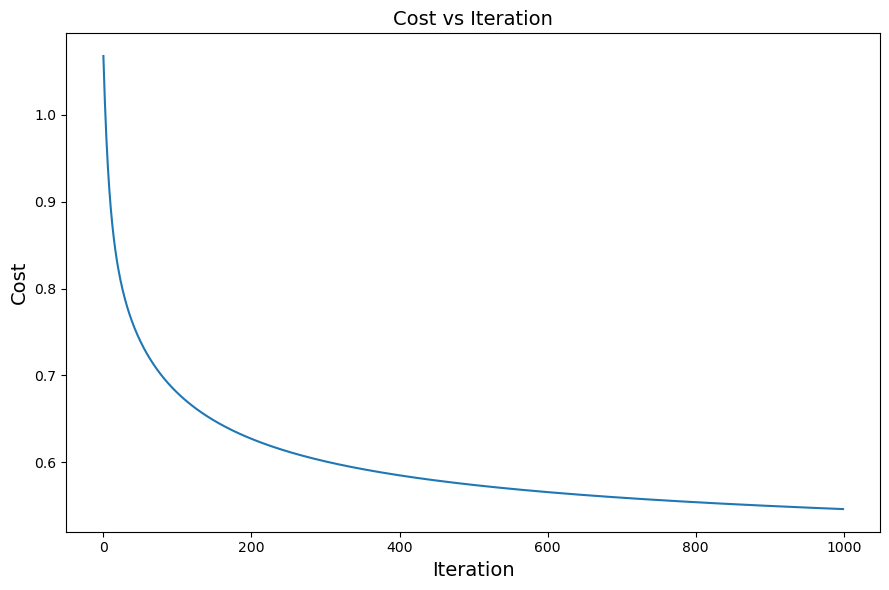

In [100]:
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000
print("\nTraining Softmax Regression Model:")
W, b, cost_history = gradient_descent_softmax(
    np.array(X_train, dtype=float),
    np.array(y_train, dtype=float),
    W,
    b,
    n_iter,
    alpha,
    show_cost=True,
)
# Plot Cost Vs. Iterations:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()

In [101]:
y_train_pred = predict_softmax(np.array(X_train, dtype=float), W, b)
y_test_pred = predict_softmax(X_test, W, b)
# Evaluate train and test performance
train_cost = calculate_cost(X_train, y_train, W, b)
test_cost = calculate_cost(X_test, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.5462
Test Loss (Cost): 0.5236


In [102]:
y_test_true = np.argmax(y_test, axis=1)

test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
# Evaluation

cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Test Accuracy: 78.65%

Confusion Matrix:
[[41  4  2]
 [ 1  4  1]
 [ 1 29 95]]
Precision: 0.94
Recall: 0.79
F1-Score: 0.85


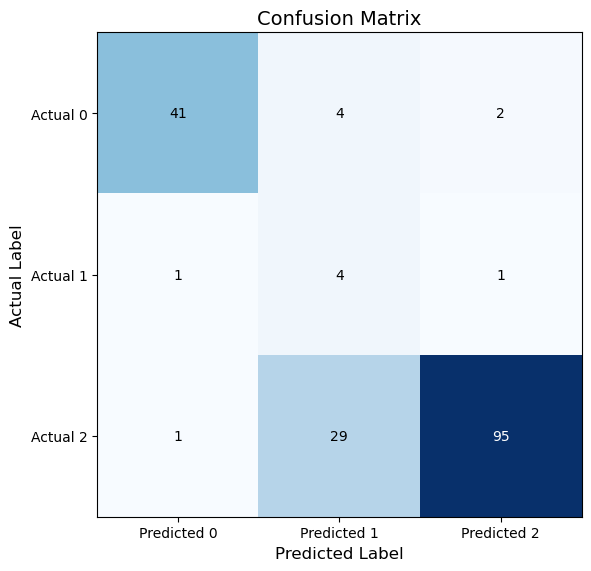

In [103]:
# Optional - Visualizing the COnfusion matrix
# Visualizing Confusion Matrix
# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap="Blues")  # Use a color map for better visualization
# Set tick labels for the axes
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(["Predicted 0", "Predicted 1", "Predicted 2"])
ax.set_yticklabels(["Actual 0", "Actual 1", "Actual 2"])
# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j,
            i,
            cm[i, j],
            ha="center",
            va="center",
            color="white" if cm[i, j] > np.max(cm) / 2 else "black",
        )

# Add grid lines and axis labels
ax.grid(False)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.tight_layout()
plt.show()